In [18]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

In [19]:
# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'
lambdas = [10, 100, 1600]
# download the data from FRED using pandas_datareader
country_series = {
    "Brazil":'NGDPRSAXDCBRQ',
    "Japan" :'NGDPRSAXDCJPQ',
}

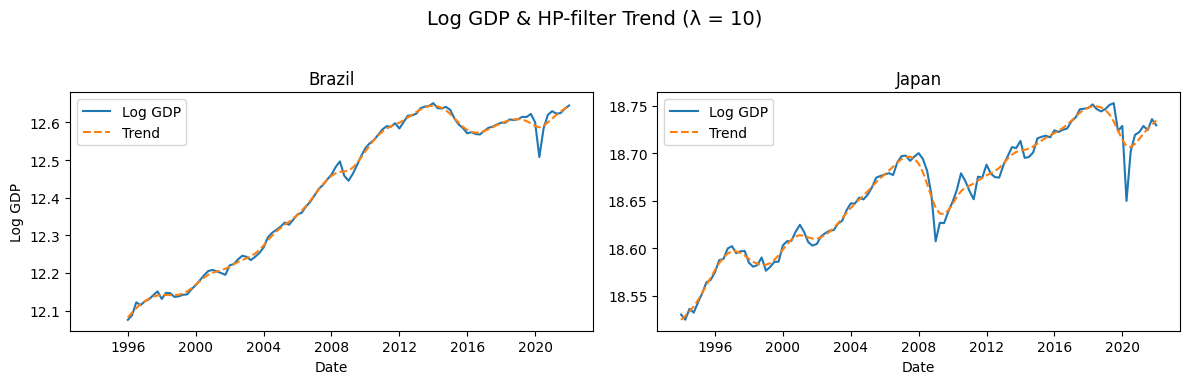

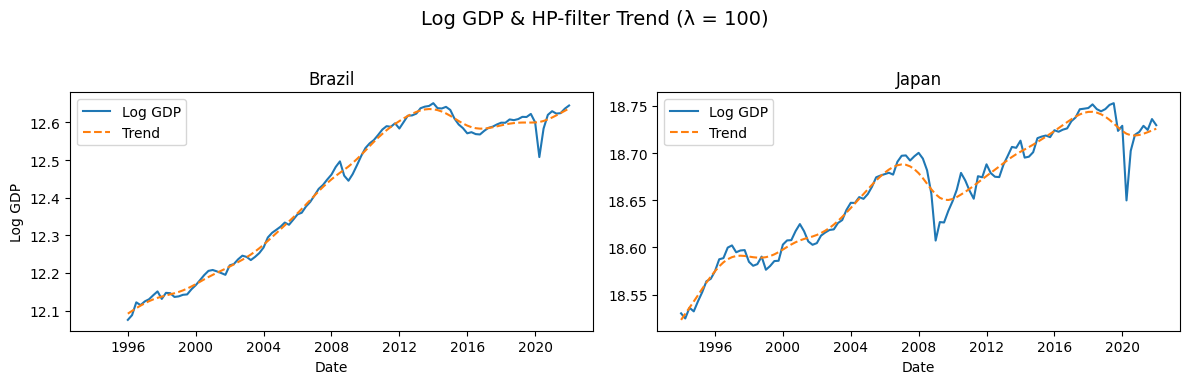

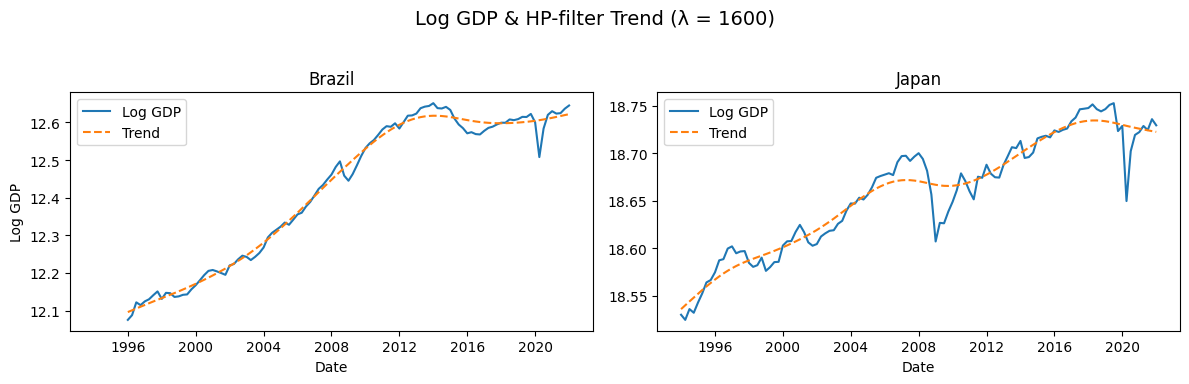

In [20]:
# collect all cyclical components
cycle_data = {country: {} for country in country_series}

# for loop of each country to build cycle_data
for country, series_id in country_series.items():
    gdp     = web.DataReader(series_id, 'fred', start_date, end_date)
    log_gdp = np.log(gdp[series_id])
    
    for lamb in lambdas:
        cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb)
        cycle_data[country][lamb] = cycle

# now plot side-by-side comparisons for each λ
for lamb in lambdas:
    # create a 1×2 grid of subplots
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=False, sharex=True)
    
    for ax, country in zip(axes, country_series):
        series_id = country_series[country]
        gdp       = web.DataReader(series_id, 'fred', start_date, end_date)
        log_gdp   = np.log(gdp[series_id])
        cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb)
        
        ax.plot(log_gdp, label="Log GDP")
        ax.plot(trend,   label="Trend", linestyle='--')
        ax.set_title(f'{country}')
        ax.legend(loc='upper left')
        ax.set_xlabel('Date')
    
    # shared y-label and overall title
    axes[0].set_ylabel('Log GDP')
    fig.suptitle(f'Log GDP & HP-filter Trend (λ = {lamb})', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [21]:
for lamb in lambdas:
    # 1) compute std dev for each country at this λ
    std_series = pd.Series(
        {country: cycle_data[country][lamb].std() for country in country_series},
        name='StdDev'
    )
    
    # 2) compute the single Brazil–Japan correlation at this λ
    corr = cycle_data['Brazil'][lamb].corr(cycle_data['Japan'][lamb])
    
    # 3) build a DataFrame and print
    stats_df = pd.DataFrame({
        'StdDev': std_series,
        'Corr_with_Japan': corr  # scalar broadcasts to all rows
    })
    
    print(f"\nλ = {lamb}")
    print(stats_df)



λ = 10
          StdDev  Corr_with_Japan
Brazil  0.011323         0.683699
Japan   0.008857         0.683699

λ = 100
          StdDev  Corr_with_Japan
Brazil  0.014965         0.722456
Japan   0.012007         0.722456

λ = 1600
          StdDev  Corr_with_Japan
Brazil  0.018848         0.581893
Japan   0.016093         0.581893


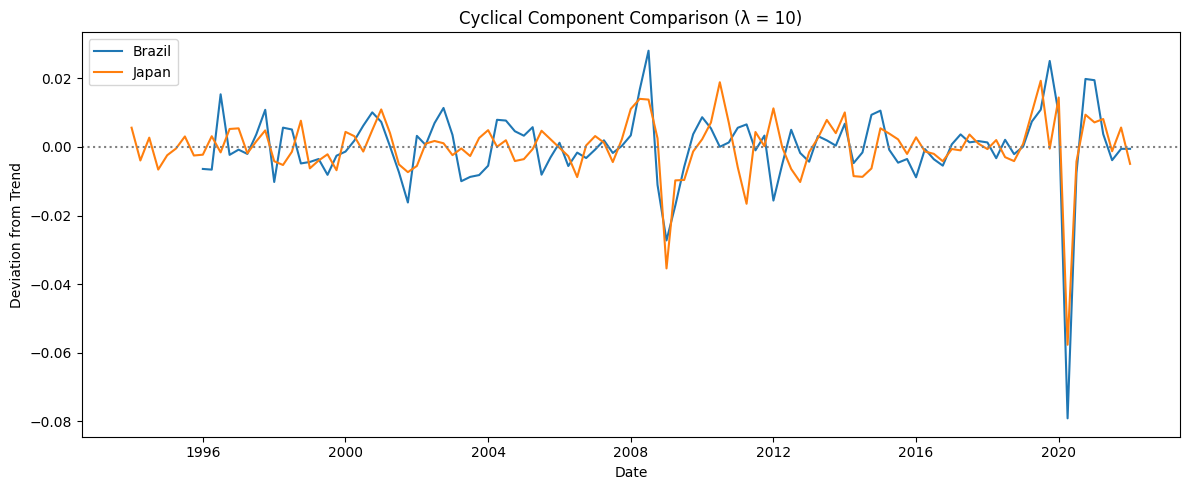

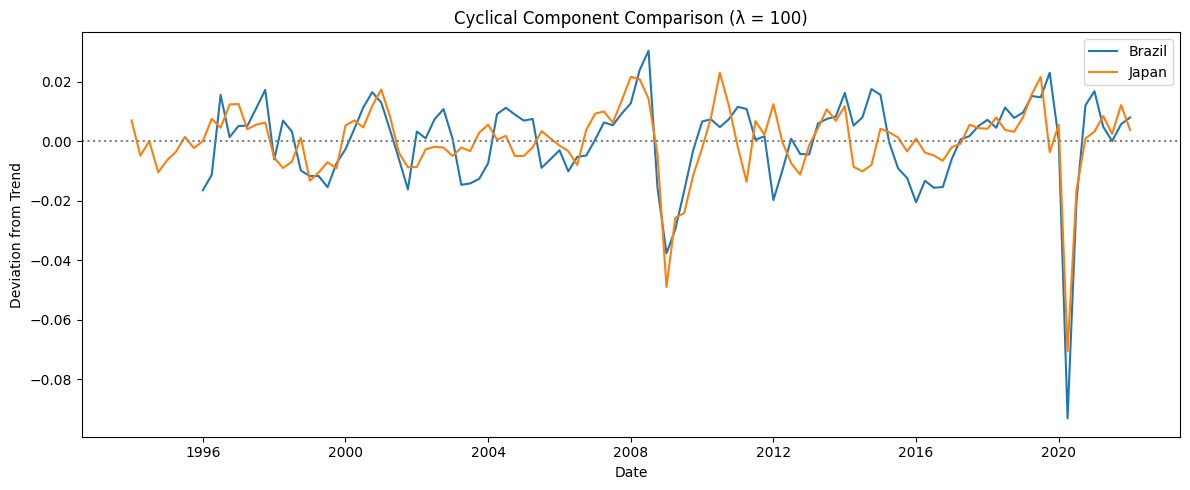

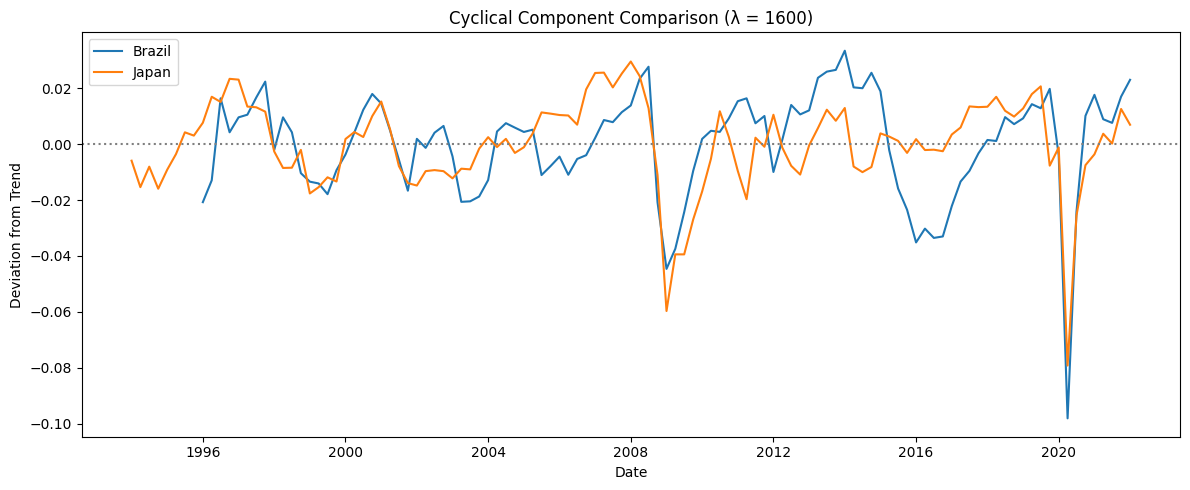

In [22]:
# Plot cyclical components for each country on a single graph  
import matplotlib.pyplot as plt
lambdas_to_plot = lambdas  

for lamb in lambdas_to_plot:
    plt.figure(figsize=(12,5))
    for country in country_series:
        plt.plot(cycle_data[country][lamb], label=country)
    plt.axhline(0, color='gray', linestyle=':')
    plt.title(f'Cyclical Component Comparison (λ = {lamb})')
    plt.xlabel('Date')
    plt.ylabel('Deviation from Trend')
    plt.legend()
    plt.tight_layout()
    plt.show()
